<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">Statistical Learning and Data Mining</h1>
<h2 align="center" style="margin-top:20px">Tutorial 4: Basic Methods for Regression</h2>
<br>

In this tutorial we use a simple dataset to discuss how you case apply the linear regression and k-Nearest Neighbours methods in Python. We  the basic steps of a supervised learning project: loading and processing the dataset, splitting the data into training and test sets, preparing the l building a model, computing predictions, and evaluating performance.  

The [scikit-learn](https://scikit-learn.org/stable/index.html) package is the main library that we use for machine learning in Python.  It provides a wide range of learning algorithms and tools through an [API](https://en.wikipedia.org/wiki/Application_programming_interface) that is very convenient and easy to use. For this reason, the basic pipeline that we introduce here is the same that we'll be using throughout the unit.

<p style="margin-bottom:25px">To help you put this material into a larger context, it's helpful to discuss that a data science project based on supervised machine learning generally follows some version of the following steps. </p>

1. **Business understanding**: establishing that a business problem is a prediction policy problem that can be addressed by supervised learning, formulating the problem by defining the loss function,  establishing the required resources for the project, 

2. **Data collection and wrangling**: acquiring and/or generating data according to the requirements of the project. Processing the data from its original format into a structured version that is free of errors and ready for exploratory data analysis.

3. **Exploratory data analysis (EDA)**: using data visualisation and descriptive statistics to summarise the main characteristics of a dataset and to obtain insights for the project.  

4. **Feature engineering**:  processing the data into the format that will be used by different learning algorithms. This involves, for example, constructing informative predictors and ensuring that the data satisfy the requirements of different methods. 

5. **Modelling**: specifying and training machine learning models, hyperparameter optimisation, model stacking, selecting the candidate model for predicting test data.  

6. **Model evaluation**: testing one or a few candidate models to ensure that they generalise well, estimating the business value of the proposed solution.  

7. **Deployment**: incorporating the final model into a production system, where it will predict new data and automate or support decisions. 

**This process is highly iterative**, rather than linear. For example, if we are not satisfied with the business performance of the final model at the model evaluation stage, we should go back and collect more data, try to construct better features (predictors), try to improve the model, etc. 

The main focus of our tutorials are the machine learning methods and concepts discussed in the lectures. However, each notebook will incorporate some elements of multiple steps of a machine learning project, so that they also develop your overall data science skills. 

<a href="#1.-Credit-Card-Data">Credit Card Data</a> <br>
<a href="#2.-Training-and-Test-Sets">Training and Test Sets</a> <br>
<a href="#3.-Exploratory-Data-Analysis">Exploratory Data Analysis</a> <br>
<a href="#4.-Feature-Engineering">Feature Engineering</a> <br>
<a href="#5.-Linear-Regression">Linear Regression</a> <br>
<a href="#6.-k-Nearest-Neighbours">k-Nearest Neighbours</a> <br>
<a href="#7.-Model-Evaluation">Model Evaluation</a> <br>
<a href="#8.-Saving-the-Data">Saving the Data</a> <br>

This notebook relies on the following imports and settings. We will load new functions and libraries in context to make clear what we are using them for. 

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  
# this is to clear the warnings from this page, usually we should leave this on

In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
tableau10 = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(tableau10) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

#%config InlineBackend.figure_format = 'retina'

## 1. Credit Card Data

In this lesson we continue working with the `Credit` dataset from the  <a href="http://www-bcf.usc.edu/~gareth/ISL/index.html" target="_blank">ISL</a> textbook. The dataset records the average credit card balace at end of the month for customers of a financial services company, as well as other individual characteristics such age, education, gender, marital status, number of cards, and credit rating. 

The business objective is to predict the average monthly credit card balance of customers based on the available predictors. We assume the squared error loss function.

We start by loading the data as in the previous tutorial. 

In [3]:
data = pd.read_csv('Data/Credit.csv', index_col='Obs')
data.head(10) 

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279


## 2. Training and Test Sets

We always split the data into training and test sets from the start, since we cannot use the test set for anything other than model evaluation. 

We use the Scikit-Learn <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split</a> function to split split the data. 

Below, we specify that the training set will contain 70% of the data. The `random_state` is an arbitrary number. If we run the analysis again with the same `random_state` we will get the same training and test sets, even though the data split is random. This is important because we always need to be able to reproduce our previous work.

In [4]:
from sklearn.model_selection import train_test_split

# I prefer to randomly split the indexes
index_train, index_test  = train_test_split(data.index, train_size = 0.7, random_state = 10)

# Write training and test sets 
train = data.loc[index_train, :].copy() # copy() does not make a difference here but it's better to be explicit
test =  data.loc[index_test, :].copy()

train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
400,18.701,5524,415,5,64,7,Female,No,No,Asian,966
26,14.090,4323,326,5,25,16,Female,No,Yes,African American,671
280,54.319,3063,248,3,59,8,Female,Yes,No,Caucasian,269
261,67.937,5184,383,4,63,12,Male,No,Yes,Asian,345
131,23.793,3821,281,4,56,12,Female,Yes,Yes,African American,868


## 3. Exploratory Data Analysis

Exploratory data analysis (EDA) is about understanding our data. The purpose is to uncover useful information for modelling, identify potential problems to be addressed, and get interesting insights. 

The EDA is based only on the training data.

<a id="profiling"></a>
### 3.1 Data profiling

The [pandas profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html) package is an efficient way to get a detailed report for exploratory data analysis. We show you how to do this in a separate notebook, as pandas profiling generates a lot of information.

### 3.2 Univariate descriptive statistics

* The count row in the first table shows the number available observations for each variable. In this case all variables have the same count, assuring us that there are no missing values. 

* The response has a large standard deviation relative to the mean: we should keep these magnitudes in mind when discussing coefficient sizes and prediction errors.  

* The first quartile of the response is 64, indicating that a substantial fraction of customers have low balance. 

In [5]:
print(len(train)) #  number of observations in the training data frame
train.describe().round(1) # rounding the table to one decimal digit

280


,Income,Limit,Rating,Cards,Age,Education,Balance
count,280.0,280.0,280.0,280.0,280.0,280.0,280.0
mean,44.6,4731.4,354.5,2.9,55.3,13.4,521.1
std,34.8,2343.7,156.6,1.3,17.3,3.2,458.2
min,10.4,855.0,93.0,1.0,23.0,5.0,0.0
25%,19.7,3082.5,247.2,2.0,41.0,11.0,64.0
50%,33.0,4636.0,344.0,3.0,54.0,14.0,459.5
75%,57.5,6034.8,443.5,4.0,69.0,16.0,864.2
max,186.6,13913.0,982.0,9.0,98.0,20.0,1999.0


### 3.3 Univariate distributions

#### 3.3.1 Response variable

We now investigate the (unconditional) distribution of the response by plotting a histogram. We find that the response has a pronouncedly right skewed distribution. A substantial number of customers have zero or low credit card balance. 

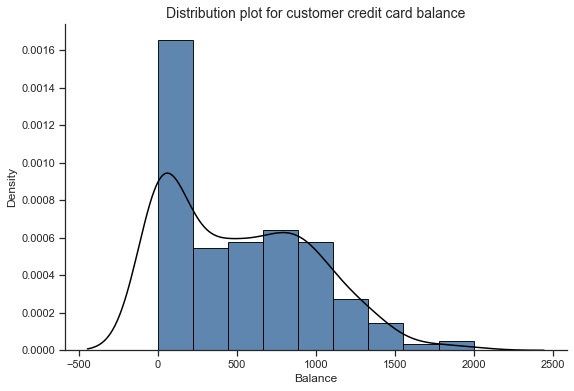

In [6]:
# The statlearning.py has additional functionality for this course  
# You have to download and place it in the same directory as you are running this notebook from

from statlearning import plot_dist
fig, ax = plot_dist(train['Balance'])
ax.set_title('Distribution plot for customer credit card balance', fontsize=14)
plt.show()

In [7]:
(train['Balance']==0).sum()

63

In [8]:
(train['Balance']==0).sum()/len(train)

0.225

*Note about the figures: the figures in the tutorials will tend to be customised for aesthetic reasons. It should be clear which parts of then code are for customisation. If you are just getting started, you may want to keep things simpler. As always, experiment with the code.*

#### 3.3.2 Predictor variables

Plotting the distribution only 

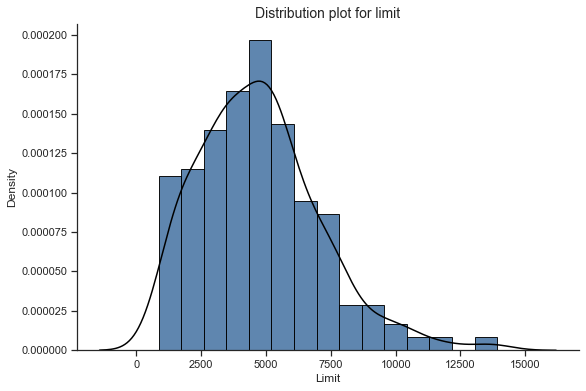

In [9]:
fig, ax = plot_dist(train['Limit'])
ax.set_title('Distribution plot for limit', fontsize=14)
plt.show()

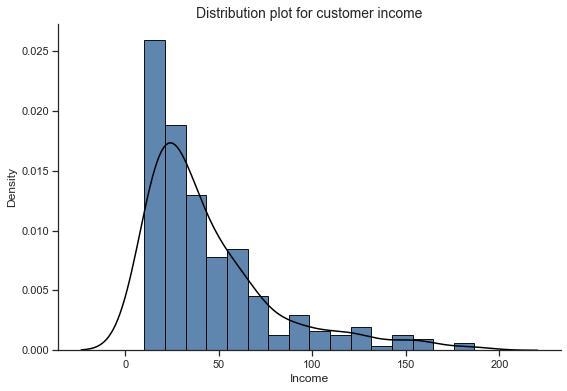

In [10]:
fig, ax = plot_dist(train['Income'])
ax.set_title('Distribution plot for customer income', fontsize=14)
plt.show()

### 3.4 Bivariate relationships

#### 3.4.1 Pairwise correlations

* The predictors that are most correlated with the response are limit, rating, and income. Limit and rating in particular have a strong linear relationship with the response. The remaining predictors have very low correlation with the credit card balance. 

* Limit and rating have nearly perfect positive correlation. Therefore, we should work with only one of these variables to avoid collinearity problems. 

In [11]:
train.corr().round(3)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000,0.797,0.797,-0.008,0.174,0.019,0.487
Limit,0.797,1.000,0.997,-0.008,0.098,0.002,0.873
Rating,0.797,0.997,1.000,0.029,0.104,-0.006,0.875
Cards,-0.008,-0.008,0.029,1.000,0.110,-0.107,0.044
Age,0.174,0.098,0.104,0.110,1.000,-0.047,0.016
Education,0.019,0.002,-0.006,-0.107,-0.047,1.000,0.007
Balance,0.487,0.873,0.875,0.044,0.016,0.007,1.000


#### 3.4.1 Bivariate plots

A scatter plot of credit limit with credit balance suggests the presence of a nonlinear relationship between these two variables. Furthermore, there are several customers with a response value of zero, which is likely to affect model fit. 

In [12]:
train['Limit'].head()

Obs
400    5524
26     4323
280    3063
261    5184
131    3821
Name: Limit, dtype: int64

In [13]:
train['Balance'].head()

Obs
400    966
26     671
280    269
261    345
131    868
Name: Balance, dtype: int64

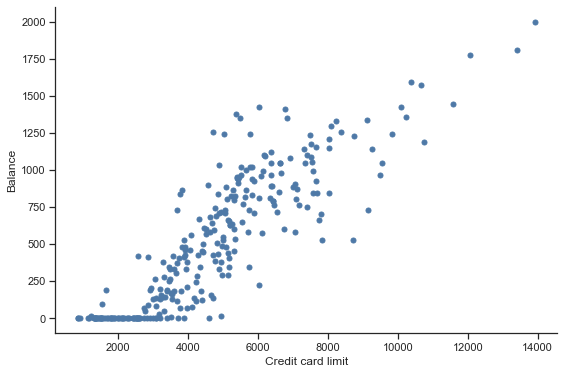

In [14]:
fig, ax = plt.subplots()
plt.scatter(train['Limit'], train['Balance'], s=25) # the s option specifies the size of the dot
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
sns.despine()
plt.show()

The next cell illustrates how we can create a figure to explore the relationship between a discrete or categorical variable and the response. 

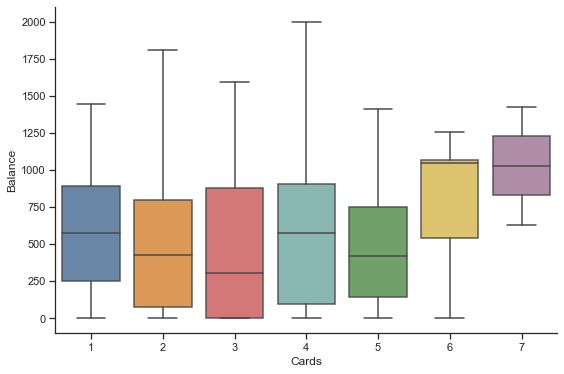

In [15]:
rows = train['Cards']<=7 # too few observations for more than 7 cards
sns.boxplot(x = train.loc[rows,'Cards'], y = train.loc[rows,'Balance'], boxprops=dict(alpha=.9))
sns.despine()
plt.show()

## 4. Feature Engineering

*Note: in a few weeks we will spend most of a lecture and a full tutorial discussing feature engineering. You don't need to worry too much about this section for now, it's here this week because we can't fit the models without it.*

We need to do the following to prepare the data for our models:

1. Create dummy variables to encode the nominal variables. 

2. Delete rating to avoid collinearity with limit. 

3. Scale the variables for k-Nearest neighbours. 

It is good practice to write a function that performs the full feature engineering process. There are a few reasons for this: 

<ul>
<li style="margin-top: 12px;">You need to process the test data in the same way, so that it avoids repetition. </li>
    
<li style="margin-top: 12px;">It helps you to build a library of data processing steps, which can save you a lot of time in the future.  </li>

<li style="margin-top: 12px;">You can use the function to continuously process new data in a live system. </li>

<li style="margin-top: 12px;">It makes it simpler for you to try different feature engineering pipelines. </li>
</ul>

In [16]:
def feat_engineering(train, test): 
    
    # a function inside a function!    
    def prepare(df):
        df['Male']=(df['Gender'] ==' Male').astype(int) # create dummy variable for gender
        df['Student']=(df['Student'] =='Yes').astype(int)
        df['Married']=(df['Married'] =='Yes').astype(int)
        df['Caucasian']=(df['Ethnicity'] =='Caucasian').astype(int)
        df['Asian']=(df['Ethnicity'] =='Asian').astype(int)
        df=df.loc[:, df.dtypes!='object'] # discards the columns that are not numerical
        df=df.drop(columns='Rating') # because of collinearity with limit
        return df
    
    # Whatever we do for the training inputs, we have to do for the test inputs
    train = prepare(train) # It's not safe to use a loop for this
    test = prepare(test)
    
    # Retrieves the columns labels that are not the response
    response = 'Balance' 
    predictors = [variable for variable in train.columns if variable!=response] 
    
    # Input scaling for kNN with Euclidean distance
    from sklearn.preprocessing import StandardScaler
    scaler =  StandardScaler()
    X_train = scaler.fit_transform(train[predictors])
    X_test = scaler.transform(test[predictors])
     
    # Output
    y_train = train[response] 
    y_test =  test[response]
        
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = feat_engineering(train, test)

In [17]:
temp = data.copy()
temp.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [18]:
(temp['Gender'] == ' Male').head(3)

Obs
1     True
2    False
3     True
Name: Gender, dtype: bool

In [19]:
(temp['Gender'] == ' Male').astype(int).head(3)

Obs
1    1
2    0
3    1
Name: Gender, dtype: int32

In [20]:
temp.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Obs,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [21]:
temp['Male'] = (temp['Gender'] == ' Male').astype(int)
temp.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male
Obs,,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1


In [22]:
temp['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [23]:
temp = temp.loc[:, temp.dtypes!='object']
temp.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Male
Obs,,,,,,,,
1,14.891,3606,283,2,34,11,333,1
2,106.025,6645,483,3,82,15,903,0
3,104.593,7075,514,4,71,11,580,1
4,148.924,9504,681,3,36,11,964,0
5,55.882,4897,357,2,68,16,331,1


In [24]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

$$Z = \frac{x-\mu}{\sigma}$$

In [25]:
temp_data = np.array([[2, 4, 6],
                      [2, 8, 10],
                      [2, 12, 13]])

In [26]:
a = temp_data[:, 2]
(a - np.mean(a))/np.std(a)

array([-1.27872403,  0.11624764,  1.16247639])

In [27]:
temp_data = np.array([[2, 4, 6],
                      [2, 8, 10],
                      [2, 12, 13]])
scaler.fit_transform(temp_data)

array([[ 0.        , -1.22474487, -1.27872403],
       [ 0.        ,  0.        ,  0.11624764],
       [ 0.        ,  1.22474487,  1.16247639]])

*Technical note: we copied the data a few times along the away. If we were working with a very large dataset we would need to worry about memory efficiency.*

## 5. Linear Regression

### 5.1 Least squares  

Scikit-learn allows us to learn and use a wide range of machine learning algorithms using a simple recipe: 

1. Import the learning algorithm.
2. Specify the model and options.
3. Fit the model.
4. Use the learned model to make predictions. 

Here, we use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">LinearRegression</a> class from Scikit-Learn.

In [28]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To compute the predictions for the test data, we do as follows:

In [29]:
y_pred = ols.predict(X_test)

Simple as that!

### 5.2 Residual plots

As mentioned in the lecture, we use residual plots to check whether our model is appropriate for the data and to find was to improve.  

The residual plots below show some problems that we already identified at the EDA stage: 

* The linear regression model generates unrestricted predictions, whereas the response variable is non-negative. 

* There are many customers with zero balance.

* There is nonlinearity in the data, in particular in the relationship with limit. 

https://i.stack.imgur.com/rtn7e.png

$$\varepsilon = y - f(x)$$

In [30]:
y_fitted = ols.predict(X_train)
resid = y_train - y_fitted

In [31]:
y_fitted[:5]

array([948.06175936, 660.12168503, 398.61965042, 445.32337504,
       836.30502927])

In [32]:
resid[:5]

Obs
400     17.938241
26      10.878315
280   -129.619650
261   -100.323375
131     31.694971
Name: Balance, dtype: float64

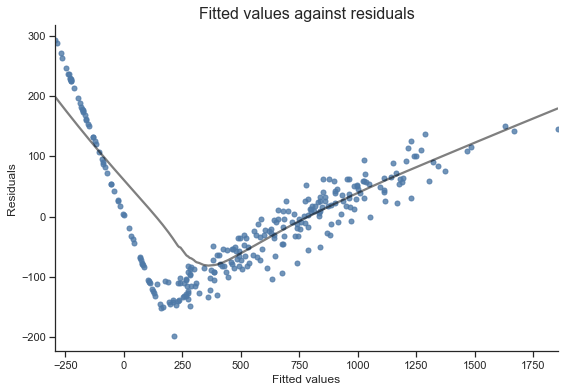

In [33]:
# tip: we usually create functions to automate plots that we use often

fig, ax = plt.subplots()
sns.regplot(y_fitted, resid, ci=None, lowess= True, scatter_kws={'s':25, 'color':tableau10[0]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

In [34]:
train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male,Caucasian,Asian
Obs,,,,,,,,,,,,,,
400,18.701,5524,415,5,64,7,Female,0,0,Asian,966,0,0,1
26,14.090,4323,326,5,25,16,Female,0,1,African American,671,0,0,0
280,54.319,3063,248,3,59,8,Female,1,0,Caucasian,269,0,1,0
261,67.937,5184,383,4,63,12,Male,0,1,Asian,345,1,0,1
131,23.793,3821,281,4,56,12,Female,1,1,African American,868,0,0,0


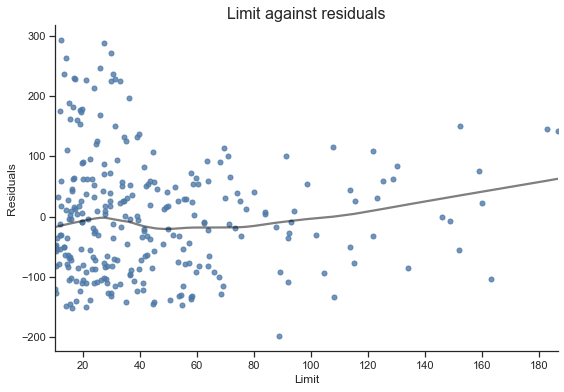

In [35]:
fig, ax = plt.subplots()
sns.regplot(train['Income'], resid, ci=None, lowess=True, scatter_kws={'s':25, 'color':tableau10[0]}, 
            line_kws={'color':'black', 'alpha':0.5})
ax.set_xlabel('Limit')
ax.set_ylabel('Residuals')
ax.set_title('Limit against residuals', fontsize=16)
sns.despine()
plt.show()

## 6. k-Nearest Neighbours

We instantiate the kNN method with the Euclidean distance as follows: 


https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs10462-019-09712-9/MediaObjects/10462_2019_9712_Fig3_HTML.png

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Euclidian Distance
knn1 = KNeighborsRegressor(n_neighbors=5) 
knn1.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

We also try the kNN method with the Mahalanobis distance. 

In [37]:
knn2 = KNeighborsRegressor(n_neighbors = 5, metric = 'mahalanobis', 
                          metric_params = {'V': np.cov(X_train, rowvar=False)}) 
knn2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='mahalanobis',
                    metric_params={'V': array([[ 1.00358423e+00,  8.00100341e-01, -7.57544975e-03,
         1.75012390e-01,  1.92844196e-02, -2.28419656e-02,
        -6.09659201e-03,  3.49189571e-02,  3.05774866e-02,
        -8.05398361e-02],
       [ 8.00100341e-01,  1.00358423e+00, -7.80354935e-03,
         9.82569733e-02,  2.17742175e-03, -4.57490684e-02,
        -8.0...
       [ 3.05774866e-02,  2.48925433e-02, -4.91482510e-03,
        -1.54544889e-02, -3.26075185e-02, -1.15371863e-01,
         4.98619326e-02,  7.37647141e-03,  1.00358423e+00,
        -5.72456525e-01],
       [-8.05398361e-02, -8.16404361e-02, -3.86817764e-02,
        -3.67093663e-02, -1.25411287e-02,  5.65307968e-02,
         5.54400701e-02, -4.77827046e-04, -5.72456525e-01,
         1.00358423e+00]])},
                    n_jobs=None, n_neighbors=5, p=2, weights='uniform')

# An Aside

Euclid vs Manhatten

$$\textrm{Manhatten}(3, 3) = 3 + 3 = 6\qquad\textrm{Euclid}(3, 3) = \sqrt{3^2 + 3^2} = 4.24$$

$$\textrm{Manhatten}(4, 2) = 4 + 2 = 6\qquad\textrm{Euclid}(4, 2) = \sqrt{4^2 + 2^2} = 4.47$$

Our choice of the number of neighbours is arbitrary for now.

## 7. Model Evaluation

The final step in our analysis is model evaluation. Try to interpret the code and results as an exercise for the tutorial.

In [38]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear Regression', 'Linear Regression (Adjusted)', 'kNN (Euclidean)', 'kNN (Mahalanobis)']
results = pd.DataFrame(0.0, columns=columns, index=rows)

# List algorithms
methods = [ols, ols, knn1, knn2] 

# Compute test predictions and metrics
for i, method in enumerate(methods):
    y_pred = method.predict(X_test) 
    if i==1:
        y_pred[y_pred < 0] = 0
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
    results.iloc[i, 1] = r2_score(y_test, y_pred)
    results.iloc[i, 2] = mean_absolute_error(y_test, y_pred) 

results.round(2)

,RMSE,R-Squared,MAE
Linear Regression,97.19,0.96,80.03
Linear Regression (Adjusted),76.86,0.97,61.11
kNN (Euclidean),314.99,0.54,256.83
kNN (Mahalanobis),268.36,0.66,202.72


In [39]:
y_pred = ols.predict(X_test) 

In [40]:
y_pred[y_pred < 0] 

array([-137.00900976, -229.92025799,  -31.80387455, -328.18279666,
        -89.80041592,  -34.16085582,  -71.36004624,  -10.14749647,
       -224.88584226,  -42.77199383, -226.27186975, -105.12029398,
        -46.60653687, -241.57602326,  -71.98388104, -144.00252716,
       -139.55717172,  -95.39864335])

In [41]:
y_pred[y_pred < 0] = 0

# New Stuff

In [70]:
train['African American'] = (train['Ethnicity'] == 'African American').astype(int)

In [71]:
ols = LinearRegression()
predictors = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Student', 'Married', 'Male', 
                                  'African American', 'Asian']
X_train = train[predictors]
Y_train = train['Balance']

ols.fit(X_train, Y_train)

ols.score(X_train, Y_train)

0.9538698052816104

In [72]:
for pred, coef in zip(predictors, ols.coef_):
    print(f"{format(coef, '.3f')} {pred}")
print(ols.intercept_)

-7.644 Income
0.176 Limit
1.321 Rating
17.271 Cards
-0.447 Age
0.273 Education
412.960 Student
-13.773 Married
-3.227 Male
-8.145 African American
6.476 Asian
-494.2127578025654


## 8. Saving the Data

We'll continue working with this dataset in the next session. Instead of starting over from the beginning, a good option here is to store the training and test dataframes in a [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file. The Hierarchical Data Format (HDF) is very useful for data science because it provides a solution for storing and managing large and heterogeneous datasets, unlike text formats such as csv.  

In [42]:
train.to_hdf('Data/Credit.h5', 'train')
test.to_hdf('Data/Credit.h5', 'test')

This code saves both the training and test dataframes to a file called `Credit.h5` in the subfolder `Data`.

It is also possible to save the model. Refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/model_persistence.html) if you wish to learn how to do that.

### Formatting

The two cells below format the notebook for display online. Please omit them from your work.

In [43]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Source+Sans+Pro|Open+Sans:800&display=swap');
</style>

In [44]:
from IPython.core.display import HTML
style = open('css\jupyter.css', "r").read()
HTML('<style>'+ style +'</style>')

FileNotFoundError: [Errno 2] No such file or directory: 'css\\jupyter.css'